## Lab 3: Wide data and linear models
### Alice Wu.  ID: qichaow

In [131]:
## Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn import manifold
from matplotlib import pyplot

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression,LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

In [132]:
testX=pd.read_csv('/Users/aliceqichaowu/Desktop/38615/test_X.csv')
trainX=pd.read_csv('/Users/aliceqichaowu/Desktop/38615/train_X.csv')
trainY=pd.read_csv('/Users/aliceqichaowu/Desktop/38615/train_y.csv')

In [133]:
print(testX.info())
print(trainX.info())
print(trainY.info())
testX.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Columns: 17971 entries, Unnamed: 0 to ENSG00000283697
dtypes: float64(17970), object(1)
memory usage: 15.1+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 444 entries, 0 to 443
Columns: 17971 entries, Unnamed: 0 to ENSG00000283697
dtypes: float64(17970), object(1)
memory usage: 60.9+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 444 entries, 0 to 443
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Unnamed: 0                     444 non-null    object
 1   xml_neoplasm_histologic_grade  444 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 7.1+ KB
None


,Unnamed: 0,ENSG00000000003,ENSG00000000005,ENSG00000000419,ENSG00000000457,ENSG00000000938,ENSG00000000971,ENSG00000001036,ENSG00000001084,ENSG00000001167,...,ENSG00000282651,ENSG00000282815,ENSG00000282939,ENSG00000283063,ENSG00000283439,ENSG00000283463,ENSG00000283526,ENSG00000283586,ENSG00000283632,ENSG00000283697
0,1576BB97-F8EA-48FF-9494-EBC7A0C97312,7.503849,1.685440,8.090089,5.546588,3.412025,5.871539,8.395029,5.894996,6.313896,...,3.626396,-2.640463,-7.278265,0.721287,-7.278265,4.672536,5.153675,-7.278265,4.843800,4.302864
1,63F4281A-4D90-4589-879E-549097FB3459,6.112919,-5.425877,5.604743,4.248246,3.374033,3.370075,6.804015,4.646287,6.236134,...,-5.425877,-2.143410,1.956699,1.377768,-5.425877,4.560829,3.735085,-5.425877,4.105789,4.803357
2,74CF740D-201D-4070-99B9-F007E7C4D472,6.183846,1.217355,6.093903,4.403216,5.722867,6.123209,7.680258,4.983386,5.626569,...,11.317818,-5.259782,5.093316,3.800607,-5.259782,4.966710,2.829487,-5.259782,5.118704,5.024979
3,1329E1C1-743E-4541-9081-165572D4BF47,6.325535,-0.197432,6.722632,4.509093,4.941256,3.700171,7.492606,5.031053,5.859242,...,3.536141,-1.362703,3.480703,0.776383,-0.999629,4.794226,-5.399485,-5.399485,4.660878,4.684343
4,88BBA1BF-44E0-416E-A028-04F410A3FE5D,7.162383,-5.539710,6.186110,5.270282,5.412103,3.781568,7.285779,4.847552,6.337205,...,5.112772,-5.539710,4.369268,2.927849,0.791397,4.542333,4.628775,-5.539710,4.812787,4.524834


In [231]:
# Check missing values
print('There are %i nan in the dataframe' % trainY.isna().sum().sum())


There are 0 nan in the dataframe


In [134]:
# Set up X_test, X_train, and y
y = trainY.iloc[:,1:]
X_train = trainX.iloc[:,1:]
X_test= testX.iloc[:,1:]

In [135]:
# Normalization
scaler = StandardScaler()  # normalization: zero mean, unit variance
scaler.fit(X_train)  # scaling factor determined from the training set

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)  # apply the same scaling to the test set


### 1. Try different linear models: linear regression, logistic regression, Ridge regression, LASSO



In [51]:
## Linear regression: 
# accruacy: 0.91666 (private), 0.84375 (public)
mdl_lar= LinearRegression()
mdl_lar.fit(X_train, y)
y_pred_LaR_temp = np.squeeze(mdl_lar.predict(X_test))
y_pred_LaR=[]
for i in y_pred_LaR_temp:
    if i>0.5:
        y_pred_LaR.append(1)
    else:
        y_pred_LaR.append(0)
# [ x for x in y_pred_LaR if x != 0 ]

In [75]:
## Logistic regression
# accruacy: 0.88888 (private), 0.83870 (public)
mdl_lr = LogisticRegression('none')
mdl_lr.fit(X_train, y)
y_pred_lr_temp = np.squeeze(mdl_lr.predict(X_test))
y_pred_LR=[]
for i in y_pred_lr_temp:
    if i>0.5:
        y_pred_LR.append(1)
    else:
        y_pred_LR.append(0)

/Users/aliceqichaowu/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [65]:
## Ridge regression
# accruacy: 0.91666 (private), 0.84375 (public)
mdl_rr = Ridge(alpha=0.1)
mdl_rr.fit(X_train, y)
y_pred_rr_temp = np.squeeze(mdl_rr.predict(X_test))
y_pred_RR=[]
for i in y_pred_rr_temp:
    if i>0.5:
        y_pred_RR.append(1)
    else:
        y_pred_RR.append(0)

In [66]:
## Lasso regression: 
# accruacy: 0.87671 (private), 0.86567 (public)
mdl_las = Lasso(alpha=0.1)
mdl_las.fit(X_train, y)
y_pred_las_temp = np.squeeze(mdl_las.predict(X_test))
y_pred_Las=[]
for i in y_pred_las_temp:
    if i>0.5:
        y_pred_Las.append(1)
    else:
        y_pred_Las.append(0)

In [73]:
## Elastic Net
# accruacy: 0.87323 (private), 0.84848 (public)
mdl_en = ElasticNet(alpha=0.1)
mdl_en.fit(X_train, y)
y_pred_en_temp = np.squeeze(mdl_en.predict(X_test))
y_pred_EN=[]
for i in y_pred_en_temp:
    if i>0.5:
        y_pred_EN.append(1)
    else:
        y_pred_EN.append(0)
    

### 2. Test regularization parameters:
- Try L1 (lasso) and L2 (ridge) on logistic regression; Try lasso and ridge regression models with with different alpha values
- After trying different models, I found out the logistic model wirh penalty='elasticnet',solver='saga',l1_ratio=0.5 has the highest accuracy 0.90140 (private score) and 0.88888 (public score). 

In [165]:
## Logistic regression
# LR1 (logitstic, penalty='l1',solver='liblinear'): 0.85714 (private), 0.81967 (public)
# LR2 (logitstic, penalty='elasticnet',solver='saga',l1_ratio=0.5): 0.90140, 0.88888
# LR2, alpha=100: 0.79120, 0.76404

mdl_lr1 = LogisticRegression(penalty='l1',solver='liblinear')
mdl_lr2 = LogisticRegression(penalty='elasticnet',solver='saga',l1_ratio=0.5)
mdl_en_a1 = ElasticNet(alpha=1)
mdl_en_a100 = ElasticNet(alpha=100)

mdl_lr1.fit(X_train, y)
mdl_lr2.fit(X_train, y)
mdl_en_a1.fit(X_train, y)
mdl_en_a100.fit(X_train, y)

y_pred_lr_temp1 = np.squeeze(mdl_lr1.predict(X_test))
y_pred_lr_temp2 = np.squeeze(mdl_lr2.predict(X_test))
y_pred_en_a1_temp=np.squeeze(mdl_en_a1.predict(X_test))
y_pred_en_a100_temp=np.squeeze(mdl_en_a100.predict(X_test))

y_pred_LR1=[]
y_pred_LR2=[]
y_pred_en_a1=[]
y_pred_en_a100=[]

for i in y_pred_en_a100_temp:
    if i>0.5:
        y_pred_en_a100.append(1)
    else:
        y_pred_en_a100.append(0)


/Users/aliceqichaowu/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/aliceqichaowu/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/aliceqichaowu/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


### 3. Random shuffle
- Model accuracy: 0.67605 (private), 0.65671 (public)

We can see that the random model will have a random chance level

In [130]:


from sklearn.utils import shuffle
X_ran, y_ran = shuffle(X_train, y)

reg = LinearRegression()
reg.fit(X_ran,y_ran)

y_pred_ran_temp = reg.predict(X_test)
y_pred_ran=[]
for i in y_pred_ran_temp:
    if i>0.5:
        y_pred_ran.append(1)
    else:
        y_pred_ran.append(0)
# y_pred_ran


In [152]:
## export the y_pred data file
y_pred_col=pd.DataFrame(data={'ID':testX.iloc[:,0],'xml_neoplasm_histologic_grade':y_pred_en_a100})
os.makedirs('/Users/aliceqichaowu/Desktop/38615/', exist_ok=True)  
y_pred_col.to_csv('/Users/aliceqichaowu/Desktop/38615/pred_en_a100.csv',index=False)  


### 4. Feature importance: find out the 10 most important features

['ENSG00000177947' 'ENSG00000180316' 'ENSG00000136352' 'ENSG00000135116'
 'ENSG00000136535' 'ENSG00000004848' 'ENSG00000130595' 'ENSG00000144290'
 'ENSG00000248546' 'ENSG00000197416']


Text(0.5, 1.0, 'Feature importance: 10 most important features')

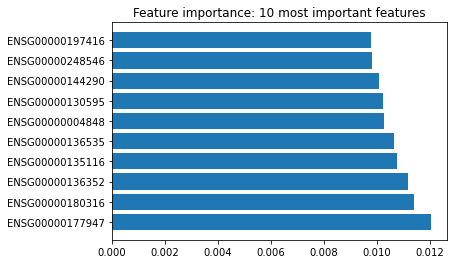

In [224]:
importance = np.flip(np.argsort(mdl_lr2.coef_[0]))
importance10=importance[0:10]
all_feat=testX.columns[1:]
all_arr=np.array(all_feat)
print(all_arr[importance10])
plt.barh(all_arr[importance10], np.flip(np.sort(mdl_lr2.coef_[0]))[0:10])
plt.title('Feature importance: 10 most important features')

### 5. Visualize the dataset: implement tSNE to visualize the clusters
- Here, we can see it is hard to differentiate two classes with tSNE

Text(0.5, 1.0, 'Training data visualized by tSNE')

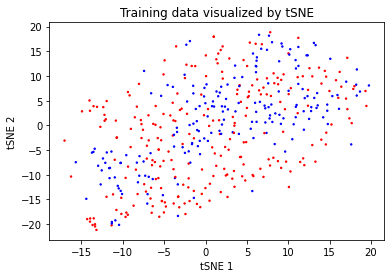

In [234]:
tsne = manifold.TSNE(random_state=42,n_components=2)
X_tsne = tsne.fit_transform(X_train)
colors = {0:'b', 1:'r'}
fig1,ax = plt.subplots()
ax.scatter(X_tsne[:,0], X_tsne[:,1],c=trainY.iloc[:,-1].map(colors), s=2)
ax.set_xlabel('tSNE 1')
ax.set_ylabel('tSNE 2')
plt.title('Training data visualized by tSNE')